## Exploratory Data Analysis
by Dhruv Goel

Dataset : [Pokemon stats](https://www.kaggle.com/abcsds/pokemon)

Hello Everyone!
I'm a beginner and I try my best to do data analysis. This Pokemon Dataset is a very good dataset to begin with and I hope you can understand my analysis.


In [13]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline

In [14]:
#Input Data
data = pd.read_csv("C:/Users/admin/OneDrive/Desktop/Pokemon.csv") #reading csv file and save it into a variable
data.head(10) #show the first 10 rows in data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


We finally know that our data has 12 columns.
* *Name*       : Nominal data
* *Type 1*     : Nominal data
* *Type 2*     : Nominal data
* *Total *     : Ratio data
* *HP *        : Ratio data
* *Attack*     : Ratio data
* *Defense*    : Ratio data
* *Sp Atk*     : Ratio data
* *Sp Def*     : Ratio data
* *Speed*      : Ratio data
* *Generation* : Ordinal data
* *Legendary*  : Nominal data

<a id = "2"></a>
### Data Cleaning
I found some unneeded text in *Name* column. For example, "CharizardMega Charizard X" should be "Mega Charizard X". So we need to remove all characters before "Mega".

In [15]:
data.Name = data.Name.str.replace(".*(?=Mega)", "")
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [16]:
data = data.set_index('Name') #change and set the index to the name attribute
data = data.drop(['#'],axis=1) #drop the columns with axis=1; axis=0 is for rows
data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


If we look at row 5, there is a NaN type in the *Type 2* row. We can choose to delete or fill in the data. But in this case if we delete rows that has NaN, then it will mess up our data. Then we'll choose to fill it by copying the data from *Type 1* column.

In [17]:
data['Type 2'].fillna(data['Type 1'], inplace=True)
data.head(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_10980\1901330840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type 2'].fillna(data['Type 1'], inplace=True)


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


<a id = "3"></a>
### Frequency
Now, let's see all unique types in *Type 1* and *Type 2*.

In [18]:
print("Type 1:",data["Type 1"].unique(), "=", len(data["Type 1"].unique()))
print("Type 2:",data["Type 2"].unique(), "=", len(data["Type 2"].unique()))

Type 1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] = 18
Type 2: ['Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark'
 'Ghost'] = 18


And we get that there are 18 unique types.
Ok, now we use *value_counts()* to count each unique type in *Type 1 * and * Type 2*

In [19]:
print(data["Type 1"].value_counts())
print(data["Type 2"].value_counts())

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64
Type 2
Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: count, dtype: int64


We can conclude that the highest frequency in *Type 1* is **Water** and in *Type 2* is **Flying**. On the other hand, the lowest frequency in *Type 1* is **Flying** and in *Type 2* is **Bug**

<a id = "4"></a>
### The Strongest and The Weakest
**Who is the strongest and the weakest Pokemons by types?** We will find out.

In [20]:
strongest = data.sort_values(by='Total', ascending=False) #sorting the rows in descending order
strongest.drop_duplicates(subset=['Type 1'],keep='first')
#since the rows are now sorted in descending order
#thus we take the first row for every new type of pokemon i.e the table will check Type 1 of every pokemon
#The first pokemon of that type is the strongest for that type
#so we just keep the first row

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,Normal,720,120,120,120,120,120,120,4,True
MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


So, we finally know who is the strongest pokemons by types. And also the strongest of the strongest pokemon is **Mega Rayquaza**, the Dragon type. And also we know that 10/18 Strongest Pokemons by types are Legendary. Let's check who is the weakest by types.

In [21]:
weakest = data.sort_values(by='Total') #sorting the rows in ascending order
weakest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Sunkern,Grass,Grass,180,30,30,30,30,30,30,2,False
Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
Kricketot,Bug,Bug,194,37,25,41,25,41,25,4,False
Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
Feebas,Water,Water,200,20,15,20,10,55,80,3,False
Pichu,Electric,Electric,205,20,40,15,35,35,60,2,False
Tyrogue,Fighting,Fighting,210,35,35,35,35,35,35,2,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Poochyena,Dark,Dark,220,35,55,35,30,30,35,3,False


We finally know who is the weakest pokemons by types. The weakest of the weakest pokemon is **Sunkern**, the Grass type. We can't find the Legendary category here.

<a id = "5"></a>
### The Fastest and The Slowest
**Now, who is the fastest and the slowest Pokemons by types?**

In [22]:
fastest = data.sort_values(by='Speed', ascending=False) #sorting the rows in descending order
fastest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
DeoxysSpeed Forme,Psychic,Psychic,600,50,95,90,95,90,180,3,True
Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
Electrode,Electric,Electric,480,60,50,70,80,80,140,1,False
LopunnyMega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False
Crobat,Poison,Flying,535,85,90,80,70,80,130,2,False
GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


The Fastest pokemon is **DeoxysSpeed Forme** which is a Legendary Psychic pokemon.

In [23]:
slowest = data.sort_values(by='Speed') #sorting the rows in ascending order
slowest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Munchlax,Normal,Normal,390,135,85,40,40,85,5,4,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
Trapinch,Ground,Ground,290,45,100,45,45,45,10,3,False
Bonsly,Rock,Rock,290,50,80,95,10,45,10,4,False
Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
Slowpoke,Water,Psychic,315,90,65,65,40,40,15,1,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Torkoal,Fire,Fire,470,70,85,140,85,70,20,3,False
Litwick,Ghost,Fire,275,50,30,55,65,55,20,5,False


This data shows that Bug type and Normal type have slowest pokemon compared other types.

<a id = "6"></a>
### Summary

In [24]:
#now, let's summary the data
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


_________________________________________________________

<a id = "7"></a>
## Data Visualisation
And now we move to the important part where we will get informations from visualizing our data. First, we make count plots to see value counts for each type

<a id = "8"></a>
### Count Plot

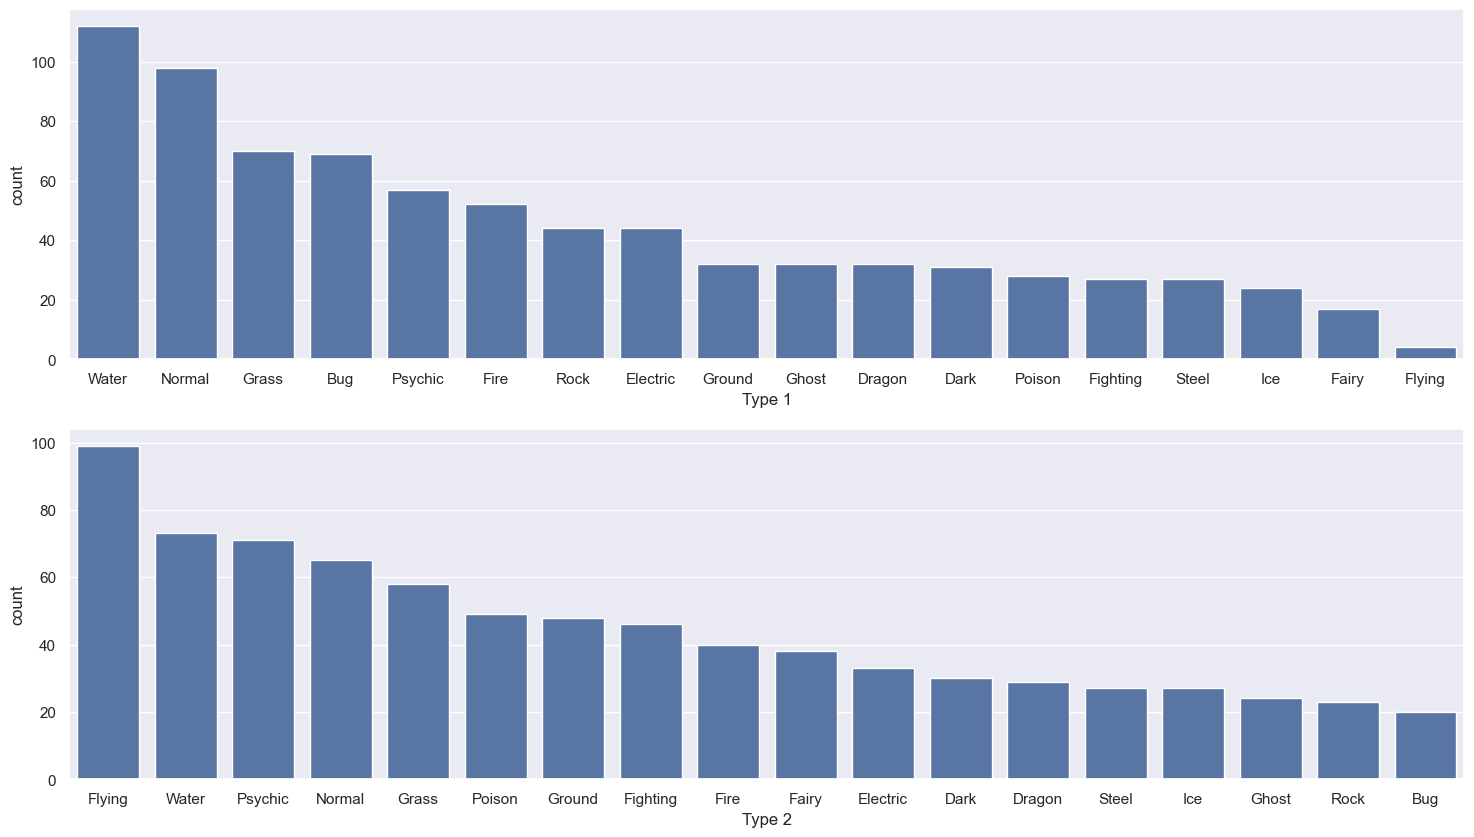

In [14]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(2,1, figsize = (18,10)) #making 2 count plots 

sns.countplot(x = 'Type 1', data = data, order = data['Type 1'].value_counts().index ,ax = ax[0])
sns.countplot(x = 'Type 2', data = data, order = data['Type 2'].value_counts().index ,ax = ax[1])

plt.show()

<a id = "9"></a>
### Percentages for each type
**How about percentages for each type?** We can make a pie plot to get informations about that. But before that we must to count all pokemon types from both columns and avoid double counting, because we copied the elements in the *Type 1* column to the *Type 2* column before. **Why we do this?** Because there are pokemon that don't have Type 2.

In [15]:
#we create a dictionary to make process easier
types_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0, 'Flying' : 0}

type1 = data["Type 1"]
type2 = data["Type 2"]

for i in range(len(type1)):
    
    #first, count the Type 1 column
    types_count[type1[i]] += 1
    
    #now we count the Type 2 column and avoid double counting
    if type1[i] != type2[i]:
        types_count[type2[i]] += 1

for t in types_count:
    print("{:10} = {}".format(t,types_count[t]))

Grass      = 95
Fire       = 64
Water      = 126
Bug        = 72
Normal     = 102
Poison     = 62
Electric   = 50
Ground     = 67
Fairy      = 40
Fighting   = 53
Psychic    = 90
Rock       = 58
Ghost      = 46
Ice        = 38
Dragon     = 50
Dark       = 51
Steel      = 49
Flying     = 101


C:\Users\admin\AppData\Local\Temp\ipykernel_18660\1046356797.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  types_count[type1[i]] += 1
C:\Users\admin\AppData\Local\Temp\ipykernel_18660\1046356797.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type1[i] != type2[i]:
C:\Users\admin\AppData\Local\Temp\ipykernel_18660\1046356797.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  types_count[type2[i]] += 1


We got overall count from both types, now it's time to get *Type 1* count and *Type 2* count.

In [16]:
type1_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}
type2_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}

for i in range(len(type1)):
    type1_count[type1[i]] += 1
    type2_count[type2[i]] += 1

print("TYPE 1")
for t in type1_count:
    print("{:10} = {}".format(t,type1_count[t]))
print("-------------------")
print("TYPE 2")
for t in type2_count:
    print("{:10} = {}".format(t,type2_count[t]))

TYPE 1
Grass      = 70
Fire       = 52
Water      = 112
Bug        = 69
Normal     = 98
Poison     = 28
Electric   = 44
Ground     = 32
Fairy      = 17
Fighting   = 27
Psychic    = 57
Rock       = 44
Ghost      = 32
Ice        = 24
Dragon     = 32
Dark       = 31
Steel      = 27
Flying     = 4
-------------------
TYPE 2
Grass      = 58
Fire       = 40
Water      = 73
Bug        = 20
Normal     = 65
Poison     = 49
Electric   = 33
Ground     = 48
Fairy      = 38
Fighting   = 46
Psychic    = 71
Rock       = 23
Ghost      = 24
Ice        = 27
Dragon     = 29
Dark       = 30
Steel      = 27
Flying     = 99


C:\Users\admin\AppData\Local\Temp\ipykernel_18660\3254927572.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type1_count[type1[i]] += 1
C:\Users\admin\AppData\Local\Temp\ipykernel_18660\3254927572.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type2_count[type2[i]] += 1


Yes! Now finally we can make the pie plot. We'll make 3 pie plots: Type 1 count, Type 2 count. and overall count,

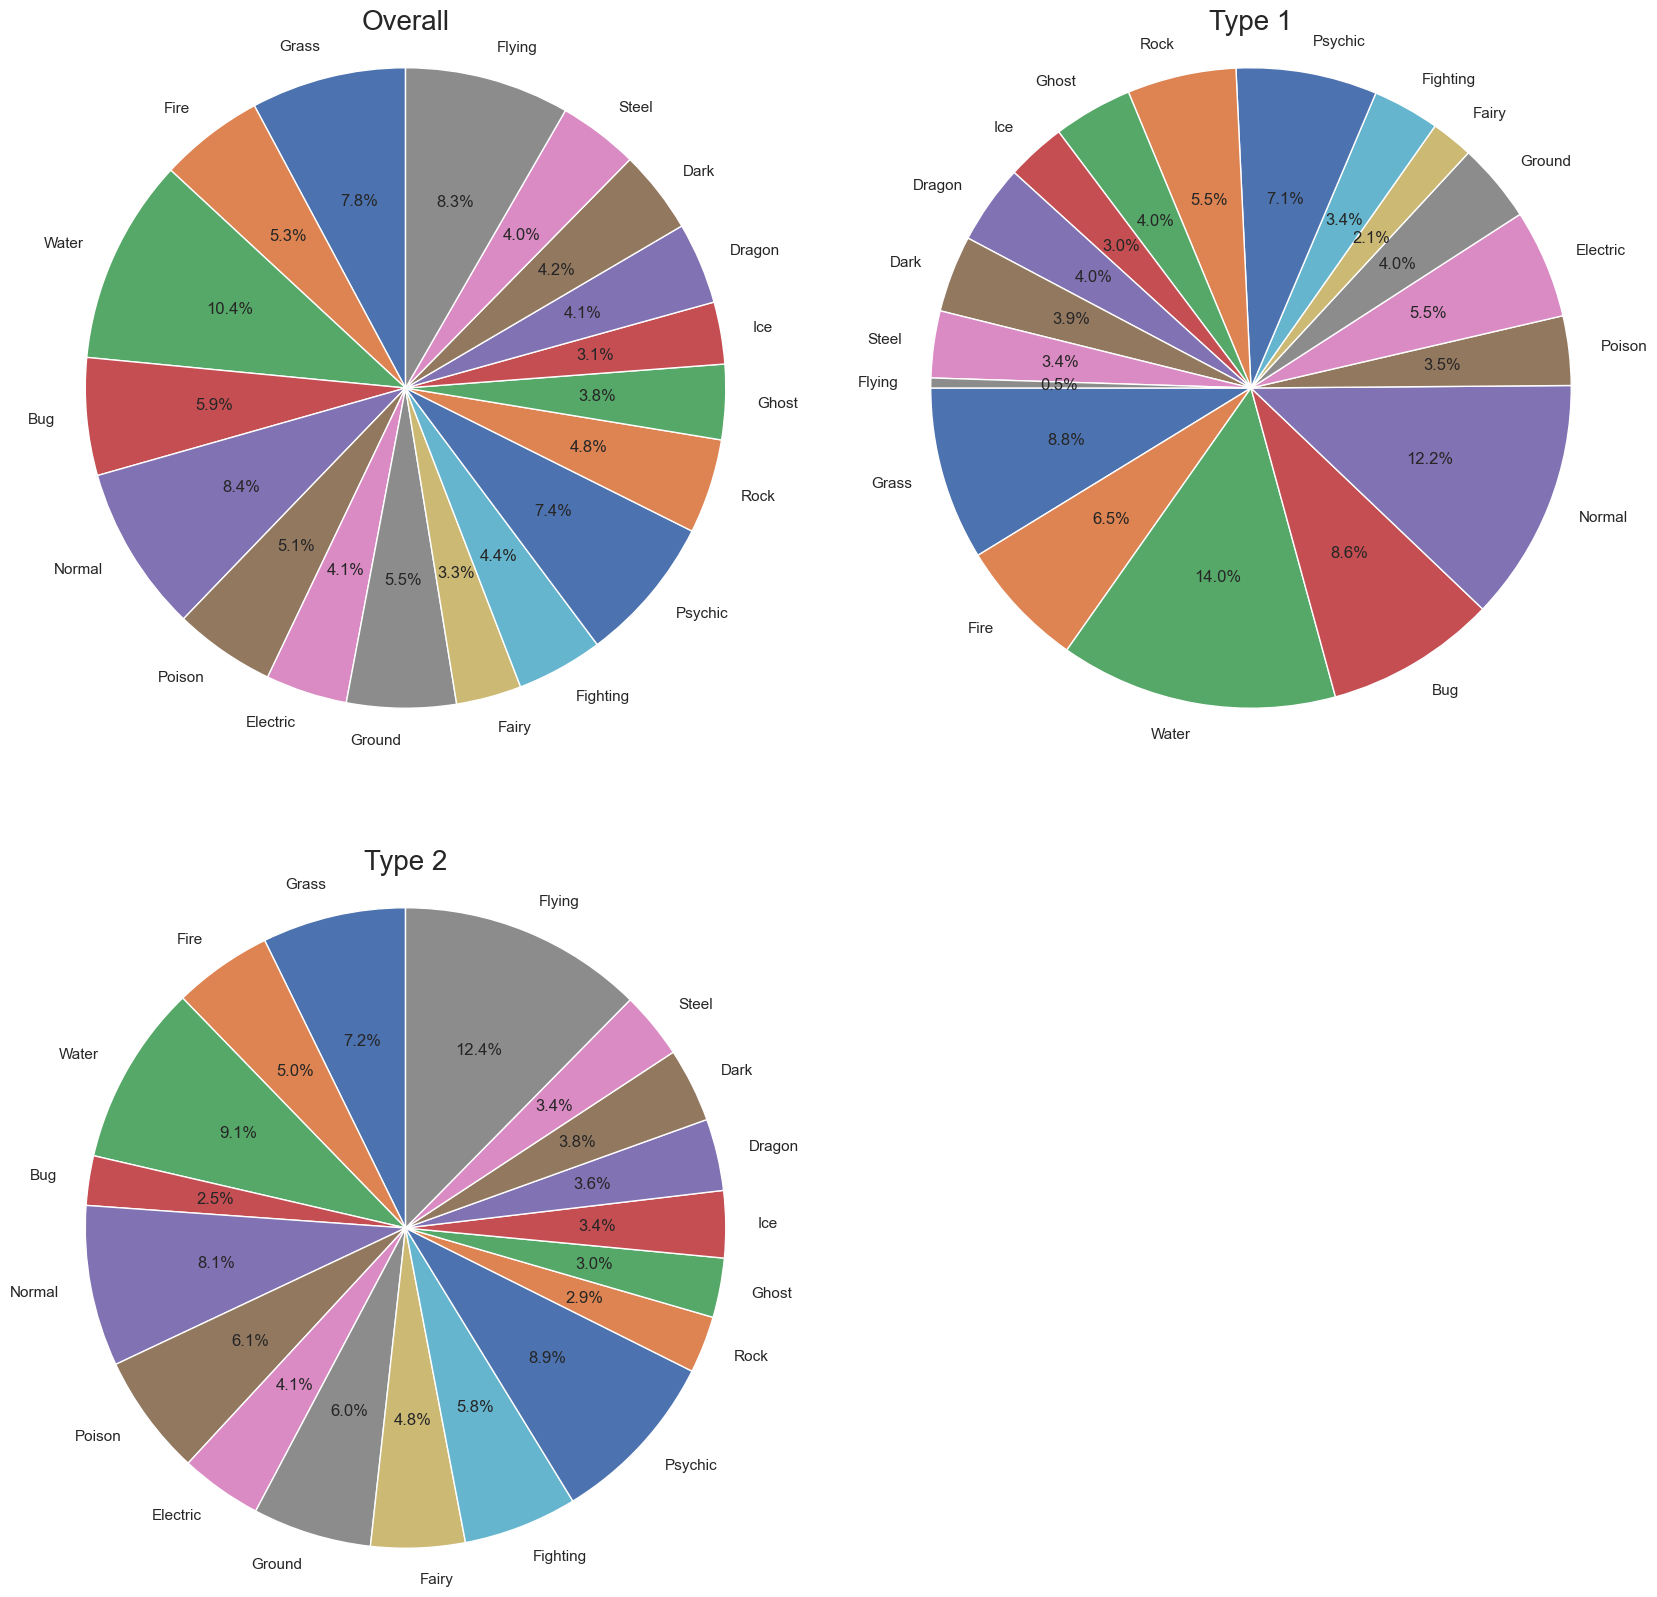

In [17]:
f, axs = plt.subplots(2,2, figsize=(20,20))

labels ='Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', \
        'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost' ,'Ice' ,'Dragon' ,'Dark' , \
        'Steel','Flying'
    
size0 = [95,64,126,72,102,62,50,67,40,53,90,58,46,38,50,51,49,101] #overall count
size1 = [70,52,112,69,98,28,44,32,17,27,57,44,32,24,32,31,27,4] #Type 1 count
size2 = [58,40,73,20,65,49,33,48,38,46,71,23,24,27,29,30,27,99] #Type 2 count

#Overall pie
axs[0,0].pie(size0, labels = labels, autopct='%1.1f%%' ,startangle = 90)
axs[0,0].axis("equal")
axs[0,0].set_title("Overall", size = 20)

#Type1 pie
axs[0,1].pie(size1, labels = labels, autopct='%1.1f%%' ,startangle = 180)
axs[0,1].axis("equal")
axs[0,1].set_title("Type 1", size = 20)

#Type2 pie
axs[1,0].pie(size2, labels = labels, autopct='%1.1f%%' ,startangle = 90)
axs[1,0].axis("equal")
axs[1,0].set_title("Type 2", size = 20)

f.delaxes(axs[1,1]) #deleting axs[1,1] so it will be white blank
plt.show()

Take a look at the data. We can conclude that the **Dragon** type pokemon has an advantage over other types because they have a higher attack compared to other types. Let's see the starter pokemon : Fire, Water, and Grass. Fire Pokemons have a higher attack than Water and Grass. So it's very recommended to use it for attacking opponent for every beginner trainer. (If you ever played pokemon, then u can understand what *starter pokemon* is)

Ok, that's all my analysis.

______________________________________